In [2]:
# import libraries
import numpy as np
import odl
%matplotlib inline

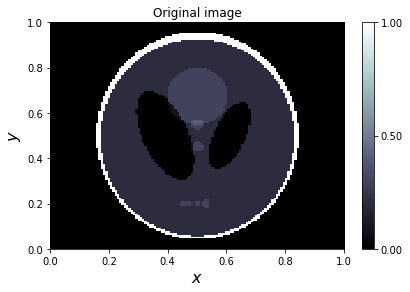

<Figure size 432x288 with 0 Axes>

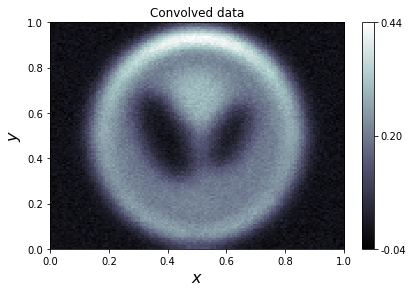

<Figure size 432x288 with 0 Axes>

In [22]:
# Discretization parameters
n = 128

# Discretized space [0,1]^2
space = odl.uniform_discr([0, 0], [1, 1], [n, n])

# Initialize convolution operator by Fourier formula
#     conv(f, g) = F^{-1}[F[f] * F[g]]
# Where F[.] is the Fourier transform and the fourier transform of a guassian
# with standard deviation filter_width is another gaussian with width
# 1 / filter_width
filter_width = 1e-1 # standard deviation of the Gaussian filter
ft = odl.trafos.FourierTransform(space)
c = filter_width ** 2 / 4.0 ** 2
gaussian = ft.range.element(lambda x: np.exp(-(x[0] ** 2 + x[1] ** 2) * c))
K = ft.inverse * gaussian * ft

# Optional: Run diagnostics to assure the adjoint is properly implemented
# odl.diagnostics.OperatorTest(conv_op).run_tests()

# Create phantom
u = odl.phantom.shepp_logan(space, modified=True)

# Create the convolved version of the phantom
f = K(u)
delta = 1e-2
f_delta = f + delta * odl.phantom.white_noise(K.range)

# results
u.show('Original image')
f_delta.show('Convolved data');


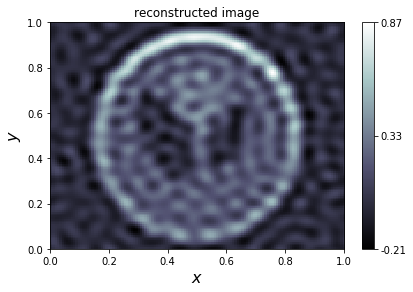

<Figure size 432x288 with 0 Axes>

|f - f_delta|/|f| =  0.059699329359968384
|u - u_cg|/|u| =  0.5915921001766264


In [25]:
# Choose a starting point
u_cg = K.domain.zero()

# Run the algorithm
odl.solvers.conjugate_gradient_normal(K, u_cg, f_delta, niter=50)

# Display images
u_cg.show(title='reconstructed image');

# error
print('|f - f_delta|/|f| = ',(K(u_cg)-f_delta).norm()/f.norm())
print('|u - u_cg|/|u| = ',(u-u_cg).norm()/u.norm())